# Home Credit Data Preprocessing

## I. Import Data & Libraries <a class="anchor" id="idl"></a>

### Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modeling
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Ignore warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

/Users/peiningfan/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


### Importing Data

In [2]:
# Import main table
train = pd.read_csv('application_train.csv',error_bad_lines=False)
test= pd.read_csv('application_test.csv',error_bad_lines=False)

# Import supplymentary table
pos = pd.read_csv('POS_CASH_balance.csv',error_bad_lines=False)
installment = pd.read_csv('installments_payments.csv',error_bad_lines=False)
credit = pd.read_csv('credit_card_balance.csv',error_bad_lines=False)
p_app = pd.read_csv('previous_application.csv',error_bad_lines=False)
bureau = pd.read_csv('bureau.csv',error_bad_lines=False)
bureau_bal = pd.read_csv('bureau_balance.csv',error_bad_lines=False)

b'Skipping line 9281263: expected 8 fields, saw 13\n'


In [3]:
# Have a look on the train data
print('Shape: ', train.shape)
train.head(5)

Shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Have a look on the label
train['TARGET'].value_counts() ## imbalanced dataset

0    282686
1     24825
Name: TARGET, dtype: int64

In [5]:
# Have a look on the test data
print('Shape: ', test.shape)
test.head(5)

Shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Have a look on the pos data
print('Shape: ', pos.shape)
pos.head(5)

Shape:  (9988759, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [7]:
# Have a look on the train data
print('Shape: ', installment.shape)
installment.head(5)

Shape:  (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [8]:
# Have a look on the credit data
print('Shape: ', credit.shape)
credit.head(5)

Shape:  (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
# Have a look on the p_app data
print('Shape: ', p_app.shape)
p_app.head(5)

Shape:  (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Have a look on the bureau data
print('Shape: ', bureau.shape)
bureau.head(5)

Shape:  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
# Have a look on the bureau_bal data
print('Shape: ', bureau_bal.shape)
bureau_bal.head(5)

Shape:  (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


**Train:** primary key: SK_ID_CURR

**Pos:** one SK_ID_CURR has many SK_ID_PREV (there are duplicate (SK_ID_CURR,SK_ID_PREV))

**Installment:** one SK_ID_CURR has many SK_ID_PREV (there are duplicate (SK_ID_CURR,SK_ID_PREV))

**Credit:** one SK_ID_CURR has many SK_ID_PREV (there are duplicate (SK_ID_CURR,SK_ID_PREV))

**p_app:** one SK_ID_CURR has many SK_ID_PREV (there are duplicate (SK_ID_CURR,SK_ID_PREV)) 

**bureau:** one SK_ID_CURR has many SK_ID_BUREAU 

**bureau_bal:** one SK_ID_BUREAU has many rows

## Data Cleaning

### Train/Test Table

#### A. Split Diffeerent Data Types

In [12]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [13]:
# Create a dataframe of only categorical variables
cat_train = train.select_dtypes(['object'])
cat_test = test.select_dtypes(['object'])

# Create a dataframe of only numerical variables
num_train = train.select_dtypes(['int64', 'float64'])
num_test = test.select_dtypes(['int64', 'float64'])

##### 1. Numerical data

In [14]:
num_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
num_test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


##### 2. Categorical Data

In [16]:
# Skim the output to look for things to fix
cat_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


In [17]:
cat_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,TUESDAY,Kindergarten,NaN,block of flats,"Stone, brick",No
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed,NaN,NaN,NaN,NaN
2,Cash loans,M,Y,Y,NaN,Working,Higher education,Married,House / apartment,Drivers,MONDAY,Transport: type 3,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
5,Cash loans,F,Y,Y,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,Drivers,MONDAY,Government,not specified,block of flats,Block,No
6,Cash loans,M,Y,Y,Unaccompanied,Working,Higher education,Married,House / apartment,High skill tech staff,THURSDAY,Industry: type 9,NaN,NaN,NaN,NaN
7,Cash loans,M,N,Y,Unaccompanied,Working,Higher education,Single / not married,With parents,Core staff,FRIDAY,Self-employed,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Core staff,THURSDAY,School,NaN,block of flats,"Stone, brick",No
9,Cash loans,F,Y,Y,Family,Working,Higher education,Civil marriage,House / apartment,Sales staff,TUESDAY,Trade: type 2,NaN,NaN,NaN,NaN


In [18]:
# Number of unique classes in each object column
cat_train.apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [19]:
cat_train.isna().sum()/len(cat_train)

NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
NAME_TYPE_SUITE               0.004201
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
OCCUPATION_TYPE               0.313455
WEEKDAY_APPR_PROCESS_START    0.000000
ORGANIZATION_TYPE             0.000000
FONDKAPREMONT_MODE            0.683862
HOUSETYPE_MODE                0.501761
WALLSMATERIAL_MODE            0.508408
EMERGENCYSTATE_MODE           0.473983
dtype: float64

In [20]:
num_train.isna().sum()/len(cat_train)

SK_ID_CURR                     0.000000
TARGET                         0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                    0.659908
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
CNT_FAM_MEMBERS                0.000007
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000


**Convert Binary Columns to Boolean**

In [21]:
bi_cols = []

# Loop through each column and store all columns with only 2 values in the bi_cols list
for col in cat_train.columns:
    if cat_train[col].nunique() <= 2:
        bi_cols.append(col)

cat_train[bi_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [22]:
bi_cols = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']

In [23]:
# Label Encoding for the test and train data
lb_make = LabelEncoder()
for col in bi_cols:
    cat_train[col] = lb_make.fit_transform(cat_train[col])
    cat_test[col] = lb_make.fit_transform(cat_test[col])

In [24]:
# Table after Label Encoding
cat_train[bi_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,0,1
1,0,0,0
2,1,1,1
3,0,0,1
4,0,0,1


**One Hot Encoding**

In [25]:
cat_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,M,0,1,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,0,F,0,0,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,1,M,1,1,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,0,F,0,1,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,0,M,0,1,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [26]:
# Using pd.get_dummies to do the OHE, this method does not need to impute the missing value
cat_train = pd.get_dummies(cat_train)
cat_test = pd.get_dummies(cat_test)
cat_train.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Combine the num_df and cat_df into one new DataFrame
encoded_train = pd.concat([num_train, cat_train], axis=1)
encoded_test = pd.concat([num_test, cat_test], axis=1)

### Supplemental Table

**Aggregation of numeric variables**

In [31]:
def agg_numeric(df, group_var, df_name):

    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = df[group_var]

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]


    for var in agg.columns.levels[0]:
        if var != group_var:
            
            # [:-1] because the index column is ''
            for stat in agg.columns.levels[1][:-1]:
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

**Aggregation of categorical variables**

In [32]:
# We have four supplemental table and we need to combine them together and merge it with main table using SK_ID_CURR

# count_categorical function will do a OHE for categorical data and for each column, calculate sum and proportion of each value
def count_categorical(df, group_var, df_name):
    
    # get the categorical data and do OHE
    cat = pd.get_dummies(df.select_dtypes('object'))
    
    # add the id
    cat[group_var] = df[group_var]
    
    # aggregate by id
    cat = cat.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # for each first level column name, we define a new column name
    for var in cat.columns.levels[0]:
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    cat.columns = column_names
    
    return cat

**Aggregation for each supplemental table**

In [33]:
# Pos
pos_counts = count_categorical(pos, group_var = 'SK_ID_CURR', df_name = 'os')
pos_agg = agg_numeric(pos, group_var = 'SK_ID_CURR', df_name = 'pos')

In [34]:
# Installment
installment_agg = agg_numeric(installment, group_var = 'SK_ID_CURR', df_name = 'installment')

In [35]:
# Credit
credit_counts = count_categorical(credit, group_var = 'SK_ID_CURR', df_name = 'credit')
credit_agg = agg_numeric(credit, group_var = 'SK_ID_CURR', df_name = 'credit')

In [36]:
# p_app
p_app_counts = count_categorical(p_app, group_var = 'SK_ID_CURR', df_name = 'p_app')
p_app_agg = agg_numeric(p_app, group_var = 'SK_ID_CURR', df_name = 'p_app')

In [37]:
# bureau
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg = agg_numeric(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')

In [38]:
# bureau_bal
bureau_bal_counts = count_categorical(bureau_bal, group_var = 'SK_ID_BUREAU', df_name = 'bureau_bal')
bureau_bal_agg = agg_numeric(bureau_bal, group_var = 'SK_ID_BUREAU', df_name = 'bureau_bal')

**Merge with train and test table**

In [39]:
# Merge with the train
encoded_train = encoded_train.merge(pos_counts, on = 'SK_ID_CURR', how = 'left')
encoded_train = encoded_train.merge(pos_agg, on = 'SK_ID_CURR', how = 'left')

encoded_train = encoded_train.merge(installment_agg, on = 'SK_ID_CURR', how = 'left')

encoded_train = encoded_train.merge(credit_counts, on = 'SK_ID_CURR', how = 'left')
encoded_train = encoded_train.merge(credit_agg, on = 'SK_ID_CURR', how = 'left')

encoded_train = encoded_train.merge(p_app_counts, on = 'SK_ID_CURR', how = 'left')
encoded_train = encoded_train.merge(p_app_agg, on = 'SK_ID_CURR', how = 'left')

encoded_train = encoded_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
encoded_train = encoded_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')


In [40]:
# Merge with the test
encoded_test = encoded_test.merge(pos_counts, on = 'SK_ID_CURR', how = 'left')
encoded_test = encoded_test.merge(pos_agg, on = 'SK_ID_CURR', how = 'left')

encoded_test = encoded_test.merge(installment_agg, on = 'SK_ID_CURR', how = 'left')

encoded_test = encoded_test.merge(credit_counts, on = 'SK_ID_CURR', how = 'left')
encoded_test = encoded_test.merge(credit_agg, on = 'SK_ID_CURR', how = 'left')

encoded_test = encoded_test.merge(p_app_counts, on = 'SK_ID_CURR', how = 'left')
encoded_test = encoded_test.merge(p_app_agg, on = 'SK_ID_CURR', how = 'left')

encoded_test = encoded_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
encoded_test = encoded_test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

In [41]:
print('Training set full shape: ', encoded_train.shape)
print('Testing set full shape: ' , encoded_test.shape)

Training set full shape:  (307511, 794)
Testing set full shape:  (48744, 790)


In [42]:
copy_encoded_train = encoded_train.copy()
copy_encoded_test = encoded_test.copy()

## Missing Values Processing

In [43]:
# Calculating proportion by summing NA values and dividing by length of DF
prop_na = encoded_train.isna().sum()/len(encoded_train)
# Filtering out columns with less than 5% NA values to clean up the visualization below
prop_na = prop_na[prop_na > 0.3]
prop_na = prop_na.sort_values(0, ascending=True).rename('missing_perc').reset_index()

In [44]:
prop_na.head()

,index,missing_perc
0,bureau_AMT_CREDIT_MAX_OVERDUE_mean,0.402018
1,TOTALAREA_MODE,0.482685
2,YEARS_BEGINEXPLUATATION_MODE,0.487810
3,YEARS_BEGINEXPLUATATION_MEDI,0.487810
4,YEARS_BEGINEXPLUATATION_AVG,0.487810


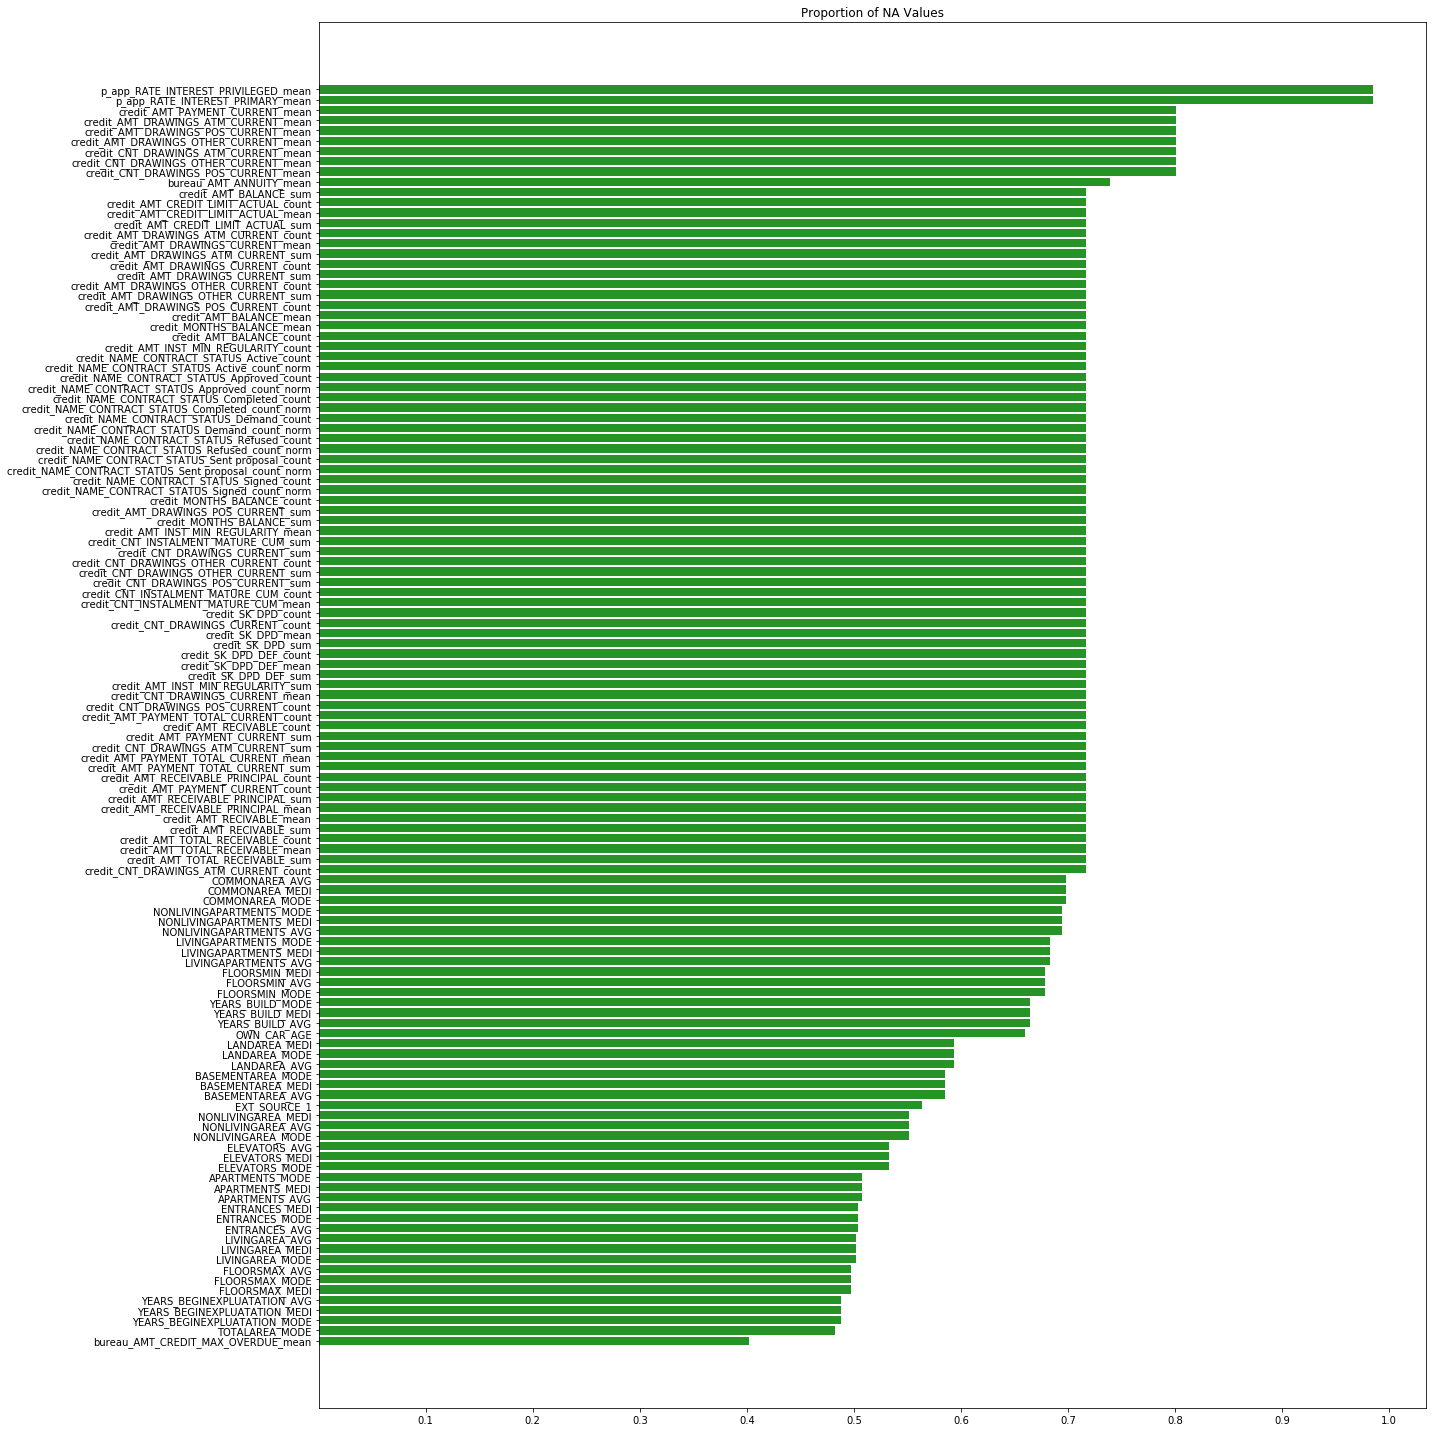

In [45]:
plt.figure(figsize=(20, 20))

barh = plt.barh(prop_na['index'], prop_na['missing_perc'], alpha=0.85, color='green')

plt.title('Proportion of NA Values')
plt.xticks(np.arange(.1, 1.01, .1))

plt.tight_layout()

In [46]:
def remove_missing(df_train, df_test, thredhold):
    
    # get the missing column and missing values percentage
    train_missing = (df_train.isnull().sum() / len(df_train)).sort_values(ascending = False)
    test_missing = (df_test.isnull().sum() / len(df_test)).sort_values(ascending = False)
    
    # filter the missing values by thredhold
    train_missing = train_missing.index[train_missing > thredhold]
    test_missing = test_missing.index[test_missing > thredhold]
    
    # combine the missing values columns from train and test
    all_missing = list(set(set(train_missing) | set(test_missing)))
    print('There are %d columns with more than %s%% missing values' % (len(all_missing), thredhold*100))
    
    # save the target column
    train_labels = train["TARGET"]
    
    # drop the missing values columns
    df_train = df_train.drop(columns = all_missing)
    df_test = df_test.drop(columns = all_missing)
    
    # align the columns from both table
    df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)
    df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)
    
    df_train["TARGET"] = train_labels
    
    print('Training set full shape: ', df_train.shape)
    print('Testing set full shape: ' , df_test.shape)
    
    return df_train, df_test

In [47]:
encoded_train, encoded_test = remove_missing(encoded_train, encoded_test, 0.60)

There are 93 columns with more than 60.0% missing values
Training set full shape:  (307511, 698)
Testing set full shape:  (48744, 697)


## Anomaly detection

In [48]:
# Days_employed
encoded_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [49]:
anom = encoded_train[encoded_train['DAYS_EMPLOYED'] == 365243]
non_anom = encoded_train[encoded_train['DAYS_EMPLOYED'] != 365243]
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))


The anomalies default on nan% of loans


In [50]:
# Create an anomalous flag column
encoded_train['DAYS_EMPLOYED_ANOM'] = encoded_train["DAYS_EMPLOYED"] == 365243
encoded_test['DAYS_EMPLOYED_ANOM'] = encoded_test["DAYS_EMPLOYED"] == 365243

In [51]:
# Replace the anomalous values with nan
encoded_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
encoded_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

## Feature Selection

### Correlation Method

In [55]:
correlation_threshold = 0.8

# Calculating an absolute value correlation matrix
corr_mat = encoded_train.corr().abs()

# Getting upper triangle of this matrix only
upper = pd.DataFrame(np.triu(corr_mat, k=1), columns=encoded_train.columns)

# Select columns with correlations above threshold
corr_col_drop = [col for col in upper.columns if any(upper[col] < correlation_threshold)]

print(f'There are {len(corr_col_drop)} columns to remove out of {len(encoded_train.columns)}.')

There are 698 columns to remove out of 698.


In [ ]:
encoded_train_if = encoded_train.drop(corr_col_drop, axis=1)
encoded_test_if = encoded_test.drop(corr_col_drop, axis=1)

### LightGBM Model Method

In [87]:
# store and remove the id column

train_id = encoded_train['SK_ID_CURR']
test_id = encoded_test['SK_ID_CURR']

encoded_train = encoded_train.drop('SK_ID_CURR', axis=1)
encoded_test = encoded_test.drop('SK_ID_CURR', axis=1)

In [88]:
# store and remove the train data target
target_train = encoded_train['TARGET']
encoded_train = encoded_train.drop('TARGET', axis=1)

In [89]:
encoded_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,p_app_DAYS_LAST_DUE_1ST_VERSION_sum,p_app_DAYS_LAST_DUE_count,p_app_DAYS_LAST_DUE_mean,p_app_DAYS_LAST_DUE_sum,p_app_DAYS_TERMINATION_count,p_app_DAYS_TERMINATION_mean,p_app_DAYS_TERMINATION_sum,p_app_NFLAG_INSURED_ON_APPROVAL_count,p_app_NFLAG_INSURED_ON_APPROVAL_mean,p_app_NFLAG_INSURED_ON_APPROVAL_sum
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,...,125.0,1.0,-25.000000,-25.0,1.0,-17.000000,-17.0,1.0,0.000000,0.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,...,-3013.0,3.0,-1054.333333,-3163.0,3.0,-1047.333333,-3142.0,3.0,0.666667,2.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,...,-694.0,1.0,-724.000000,-724.0,1.0,-714.000000,-714.0,1.0,0.000000,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,...,366336.0,4.0,182477.500000,729910.0,4.0,182481.750000,729927.0,4.0,0.000000,0.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,...,-4186.0,5.0,72136.200000,360681.0,5.0,72143.800000,360719.0,5.0,0.600000,3.0


In [109]:
# format the column name
encoded_train.columns = [''.join (c if c.isalnum() else '_' for c in str(x)) for x in encoded_train.columns]
encoded_test.columns = [''.join (c if c.isalnum() else '_' for c in str(x)) for x in encoded_test.columns]

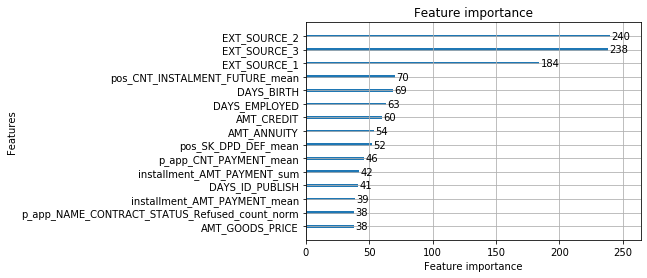

In [91]:
# build a LightGBM model to select important features
d_train = lgb.Dataset(encoded_train, label=target_train)
param = {'max_depth': 5, 'learning_rate' : 0.1, 'num_leaves': 900, 'n_estimators': 100}
model = lgb.train(params=param,train_set=d_train)
ax = lgb.plot_importance(model, max_num_features=15)
plt.show()

In [92]:
feature_important_thredhold = 5
feature_important = {model.feature_name()[i]:model.feature_importance()[i]  for i in range(len(model.feature_importance()))}
LGBM_features_columns = [d for d in feature_important if feature_important[d] > feature_important_thredhold]
print(f'There are {len(encoded_train[LGBM_features_columns].columns)} important features after LightGBM selection.')

There are 104 important features after LightGBM selection.


Cleaned table summary:

train data after feature selection: encoded_train_if

test data after feature selection: encoded_test_if

target train data: target_train

#### 4. PCA

In this section, we will reduce the columns by a separate method, PCA. 

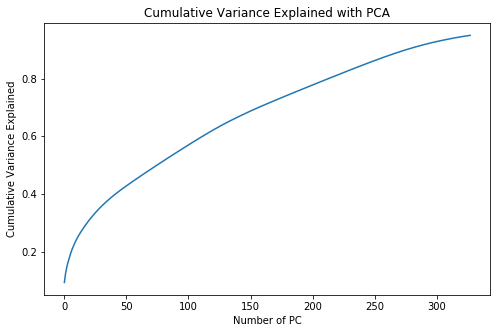

In [116]:
# define the number of components
n_comp=.95

# create a pca pipeline with median imputation
pipeline = Pipeline(steps = [('scaler', StandardScaler()),
                             ('imputer', SimpleImputer(strategy = 'median')),
                             ('pca', PCA(n_components=n_comp, svd_solver='full', random_state=1))])

pca = pipeline.named_steps['pca']

pipeline.fit(encoded_train)

train_pca = pipeline.transform(encoded_train)
test_pca = pipeline.transform(encoded_test)

plt.figure(figsize = (8, 5))
plt.plot(list(range(train_pca.shape[1])), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
plt.title('Cumulative Variance Explained with PCA');

In [115]:
# Select top n princple features
total_variance_explained = 0
print('Individual variance contributions:')

for j in range(12):
    print(pca.explained_variance_ratio_[j])
    total_variance_explained += pca.explained_variance_ratio_[j]
print('Explained variance: %.4f' % total_variance_explained)

Individual variance contributions:
0.0928864995917246
0.0324003123826019
0.02179516850418253
0.01674594659264894
0.014849951031926118
0.013948891823303142
0.012777030041350688
0.010421046889777859
0.00990375141987204
0.009592594855122698
0.00850507801520795
0.008011782821158367
Explained variance: 0.2518


In [125]:
df_pca_train = pd.DataFrame(data=train_pca)
df_pca_test = pd.DataFrame(data=test_pca)

Here we can see that pca is not useful since there are still lots of variables.

In [127]:
# export cvs file
encoded_train_if['TARGET'] = target_train

encoded_train_if.to_csv('encoded_train_if.csv')
encoded_test_if.to_csv('encoded_test_if.csv')